In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

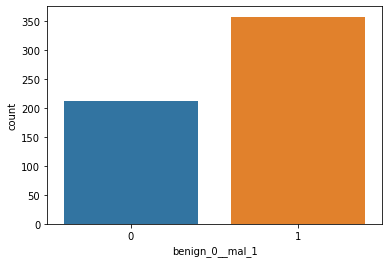

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

In [10]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [11]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<AxesSubplot:>

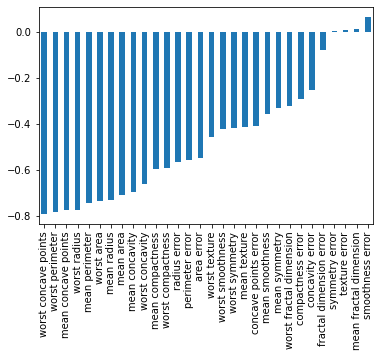

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

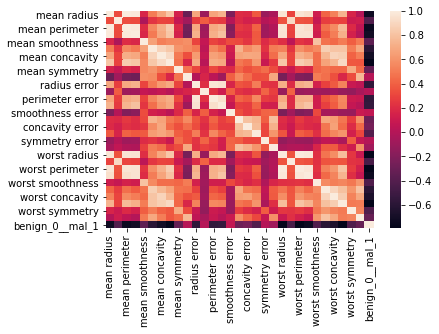

In [16]:
sns.heatmap(df.corr())

In [18]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense,Dropout

In [28]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.6798 - val_loss: 0.6566
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6305 - val_loss: 0.6141
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5850 - val_loss: 0.5658
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5344 - val_loss: 0.5114
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4797 - val_loss: 0.4539
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4252 - val_loss: 0.4030
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3766 - val_loss: 0.3546
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3359 - val_loss: 0.3161
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3032 - val_loss: 0.2814
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2730 - val_loss: 0.2584
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.1039
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.1053
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0503 - val_loss: 0.1034
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0505 - val_loss: 0.1065
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0496 - val_loss: 0.1060
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.1052
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0497 - val_loss: 0.1053
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.1111
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0513 - val_loss: 0.1006
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.1097
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.1239
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.1308
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0375 - val_loss: 0.1215
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.1280
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0371 - val_loss: 0.1174
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.1370
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0374 - val_loss: 0.1148
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.1247
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0407 - val_loss: 0.1299
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.1281
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1251
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.1343
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.1386
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1272
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.1340
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.1236
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.1562
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1219
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1257
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1474
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0207 - val_loss: 0.1402
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.1341
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.1385
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.1284
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.1434
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.1350
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.1348
Epoch 333/600
14/14 [==============================] - ETA: 0s - loss: 0.014 - 0s 4ms/step - loss: 0.0209 - val_loss: 0.1413
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.1301
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0204

Epoch 407/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.1477
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.1517
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.1527
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.1373
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.1511
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.1405
Epoch 413/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.1772
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.1293
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.1740
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0153 - val_los

14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.1842
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.1807
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.1681
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.1901
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.1784
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.1736
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.1936
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.1767
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.1973
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.1760
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0095 - val_loss: 0.1943
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.2106
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.1959
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.2038
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.2044
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.2081
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.2172
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.2127
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.2123
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.2137
Epoc

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

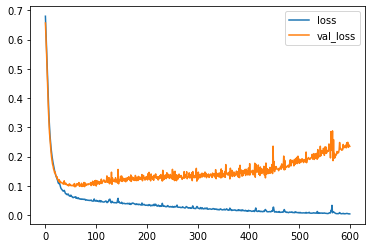

In [33]:
losses.plot()

In [42]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [45]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6767 - val_loss: 0.6547
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6365 - val_loss: 0.6139
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.5695
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5497 - val_loss: 0.5240
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5042 - val_loss: 0.4801
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4613 - val_loss: 0.4353
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4202 - val_loss: 0.3946
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3829 - val_loss: 0.3603
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3506 - val_loss: 0.3285
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3229 - val_loss: 0.3055
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0535 - val_loss: 0.1028
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0543 - val_loss: 0.1088
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.1035
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.1062
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.1039
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0604 - val_loss: 0.1078
Epoch 00088: early stopping


In [46]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

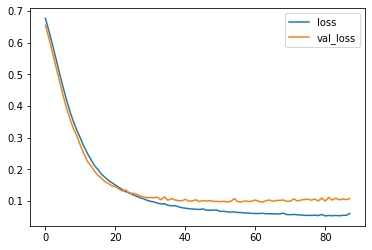

In [47]:
model_loss.plot()

In [52]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [53]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7605 - val_loss: 0.7061
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7108 - val_loss: 0.6825
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6939 - val_loss: 0.6633
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6587 - val_loss: 0.6446
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6482 - val_loss: 0.6304
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6507 - val_loss: 0.6163
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6293 - val_loss: 0.5948
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5937 - val_loss: 0.5663
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5737 - val_loss: 0.5410
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5536 - val_loss: 0.5086
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1289 - val_loss: 0.0988
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1192 - val_loss: 0.0936
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1095 - val_loss: 0.0908
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 0.0966
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1211 - val_loss: 0.0907
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1334 - val_loss: 0.0958
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1157 - val_loss: 0.0936
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1109 - val_loss: 0.0884
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1027 - val_loss: 0.0912
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1246 - val_loss: 0.0965
Epoch 93/600


In [54]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

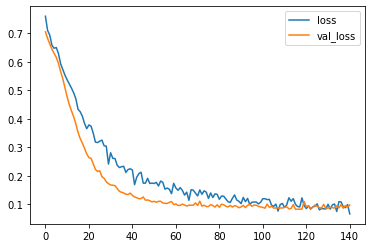

In [55]:
model_loss.plot()

In [61]:
predictions = model.predict_classes(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [64]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
